# Linear Least-Squares Fit

This interactive notebook allows you to visualize the squared error between a linear function and the points it is attempting to fit.  By adjusting the sliders, try to reduce the total amount of area and therefore the area.  When you have minimized this area, you will be very close to the optimum least-squares mathematical fit.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [7]:
def linear_plot():
    clear_output(True)
    x = np.linspace(-2,10,11)
    y = slope.value * x + intercept.value
    plt.plot(x, y)
    plt.grid(True)
    plt.xlim((-1, 5))
    plt.ylim((-1, 5))
    plt.title('$y = {0}x + {1}$'.format(slope.value, intercept.value))
    ax = plt.gca()
    ax.set_aspect('equal')

    def get_y_coord(x, slope, intercept):
        return slope * x + intercept

    def plot_point_and_squared_error(p, ax):
        # p[0] and p[1] are the x and y of the data point
        # xp1 and xp1 are the lower left of a square representing the error
        # xp2 and yp2 are the opposite corner of a square representing the error
        # get y point on line
        xp1, yp1 = p[0], p[1]
        yp2 = get_y_coord(p[0], slope.value, intercept.value)
        y_error = yp2 - p[1]
        width = abs(y_error)
        # if point is above line point on line is lower left corner
        if y_error < 0:
            yp1 = yp2
        ax.add_patch(Rectangle((xp1 ,yp1), width, width, alpha=0.1))
        ax.plot(p[0], p[1], 'x')
        return width**2
    
    points = [(0.,0.3), (1.,0.7), (2., 2.5), (3., 2.6)]
    error = 0
    for p in points:
        error += plot_point_and_squared_error(p, ax)
    print('squared error =', error)

squared error = 6.75


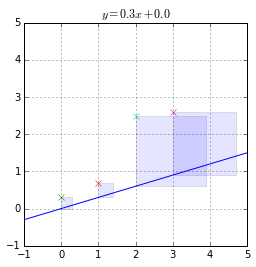

In [8]:
import ipywidgets
from IPython.display import display, clear_output

slope = ipywidgets.FloatSlider(min=-2, max=2, value=0, step=0.1, 
                                 description="slope")
intercept = ipywidgets.FloatSlider(min=-5, max=5, value=0, step=0.1,
                                 description="intercept")

display(slope)
display(intercept)


slope.on_trait_change(linear_plot, 'value')
intercept.on_trait_change(linear_plot, 'value')
linear_plot()